In [ ]:
# install package
!pip install tensorflow
!pip install torch
!pip install torchinfo

# **퍼셉트론 (Perceptron)**

- 생물학적인 신경계의 기본 단위인 뉴런의 동작 과정을 수학적으로 모델링한 것
- 초기 형태의 인공신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘
- $y = \sigma(W^Tx+b)$ &#160;&#160;&#160;&#160; [&#160; $x$: 입력값(Input) &#160;&#160; $W$: 가중치(Weight) &#160;&#160; $b$: 편향(Bias) &#160;&#160; $\sigma$: 활성화 함수(Activation function) &#160;] 

In [2]:
# 퍼셉트론 알고리즘 (학습 과정 포함 X)
import numpy as np

def step_function(x:np.ndarray):
  return np.where(x>=0, 1, 0)

class Perceptron:

  def __init__(self, input_dim, activation_function):
    self.weight = np.random.randn(1,input_dim)
    self.bias = np.random.randn(1,1)
    self.activation_function = activation_function
  
  def forward(self, x):
    return self.activation_function(np.dot(x, self.weight.T) + self.bias)

In [3]:
x = np.random.randn(1,5)                          # x.shape = (데이터 개수, 특성 개수)
model = Perceptron(x.shape[1], step_function)     # 퍼셉트론 모델 생성

print(f"Input: \n{x}\n")
print(f"Weight: \n{model.weight}\n")
print(f"Bias: \n{model.bias}\n")
print(f"Output: \n{model.forward(x)}")

Input: 
[[-0.48874591 -0.29825496 -0.29593014  0.52755974 -1.42644205]]

Weight: 
[[ 1.56276553 -0.92320145  0.23994069 -0.02178744 -0.77036533]]

Bias: 
[[-0.11406077]]

Output: 
[[1]]


# **신경망 (Neural Network)**

<img src="https://blog.kakaocdn.net/dn/J9yCn/btqzgoBgFMH/B0C2QUxFyqxvZukpdqdPNK/img.png" width="450">

- 인간의 뇌를 모방하여 만든 네트워크로, 퍼셉트론이 여러겹으로 쌓여있는 형태
- 각각의 퍼셉트론은 노드(Node) 또는 유닛(Unit)이라고 부르고, 노드들 간의 연결은 가중치로 표현
- 입력층 (Input Layer)
    - 데이터가 입력되는 층으로, 데이터의 특성 수 만큼의 노드를 가짐
    - 어떠한 계산도 수행하지 않고, 다음 층으로 값을 그대로 전달
- 은닉층 (Hidden Layer)
    - 입력층과 출력층 사이에 있는 층으로, 노드의 수는 자유롭게 구성할 수 있음.
    - 입력 신호가 가중치와 편향과 함께 계산되고 활성화 함수를 지남
    - 일반적으로 2개 이상의 은닉층을 가지고 있으면 심층신경망(Deep Neural Network, DNN)이라고 부름
- 출력층 (Output Layer)
    - 연산을 마친 결과가 출력되는 층
    - 풀어야 할 문제에 따라 노드의 수와 활성화 함수가 달라짐

### **활성화함수 (Activation Function)**

<img src="https://hwk0702.github.io/img/activate1.png" width="50%">

은닉층에서,
- 활성화 함수는 비선형 함수를 사용 (선형 함수를 사용하면 비선형 회귀나 분류가 불가능하기 때문)
- sigmoid 함수나 tanh 함수는 역전파 상황에서 기울기가 소실되는 문제가 발생하기 쉽기 때문에 잘 사용되지 않음 <br />(그래도 사용한다면 sigmoid 함수보다는 tanh 함수가 더 좋음)
- 간단하면서 연산량이 적고 안정적으로 학습을 가능하게 하는 ReLU 종류의 함수 많이 사용
- RNN에서는 ReLU 함수를 사용할 경우 출력값이 발산하는 문제가 생길 가능성이 있어 tanh 함수 많이 사용

출력층에서,
- 회귀 문제의 경우, 활성화 함수를 사용하지 않고 그대로 결과를 출력
- 이진 분류 문제의 경우, sigmoid 함수 사용 (0~1 사이의 값 반환)
- 다중 분류 문제의 경우, softmax 함수 사용 (0~1 사이의 값 반환, 값을 모두 합하면 1)

### **손실함수 (Loss Function)**

- 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
- 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
- 최적화 이론에서 최소화 하고자 하는 함수
- 미분 가능한 함수 사용

#### **분류 (Classfication)**
- 교차 엔트로피 오차 (Cross Entropy Error, CEE): 다중 분류 문제에 사용
- 이진 교차 엔트로피 오차 (Binary Cross Entropy Error, BCEE): 이진 분류 문제에 사용

**원-핫 인코딩 (One-Hot Encodeing)**

<img src="https://miro.medium.com/v2/resize:fit:1200/0*PO_ENSfL80nPRqIg" width="650">

- 범주형 변수를 표현할 때 사용
- 정답인 레이블을 제외하고 0으로 처리
- 가변수(Dummy Variable)이라고도 함

**교차 엔트로피 오차(Cross Entropy Error, CEE)**

- 소프트맥스 함수를 적용한 모델의 출력값과 원-핫 인코딩 값을 비교
- 교차 엔트로피 오차 식: $ \qquad \qquad E = - \frac{1}{N}\sum_{n} \sum_{i}  y_i\ log\tilde{y}_i  $ 
  - $y_i$ : 원-핫 인코딩의  $i\ $번째 값
  - $\tilde{y}_i$ : 모델의 $i\ $번째 출력값
  - $N$ : 전체 데이터의 개수
- 정답인 클래스에 대해서만 오차를 계산
- $y_i$가 1인 상황에서 $\tilde{y}_i$가 1에 가까울 수록 오차는 0에 가까워지고, 0에 가까울 수록 오차는 무한히 커짐

**이진 교차 엔트로피 오차(Binary Cross Entropy Error, BCEE)**

- 이진 분류 문제에서도 크로스 엔트로피 오차를 손실함수로 사용 가능
- 이진 교차 엔트로피 오차식:
$ \qquad \qquad E = - \sum_{i=1}^2  y_i\ log\tilde{y}_i \\ 
\qquad \qquad \ \ \ = -y_1\ log\ \tilde{y}_1 - (1 - y_1)log(1-\ \tilde{y}_1) \qquad ( \because y_2 = 1 - y_1) $
  - $y_i$ : 원-핫 인코딩의  $i\ $번째 값
  - $\tilde{y}_i$ : 모델의 $i\ $번째 출력값

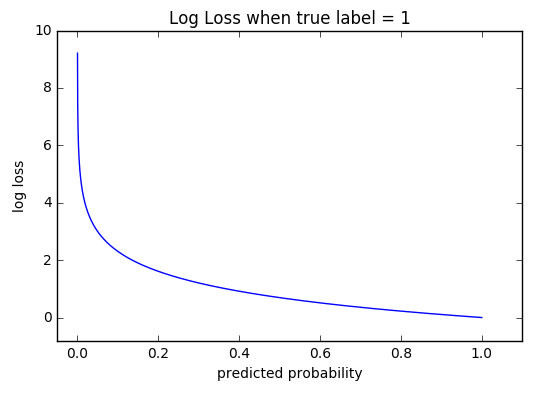

#### **회귀 (Regression)**

- 평균 제곱오차 (Mean Squared Error, MSE)
- 평균 절대오차 (Mean Absolute Error, MAE)

**평균 제곱오차 (Mean Squared Error, MSE)**

- 가장 많이 쓰이는 손실 함수 중 하나
- 평균 제곱오차 식: $ \qquad \qquad E = \frac{1}{N}\sum_{i=1}^N ( y_i - \tilde{y}_i)^2 $
    - $y_i$ : $i\ $번째 학습 데이터의 정답
    - $\tilde{y}_i$ : $i\ $번째 학습 데이터에 대한 모델의 예측값
    - $N$ : 전체 데이터의 개수
- 정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부여

<br />
<img src="https://miro.medium.com/max/1152/1*EqTaoCB1NmJnsRYEezSACA.png" width="450">
<br />


**평균 절대오차 (Mean Absolute Error, MAE)**

- 평균 절대오차 식:
$ \qquad \qquad E = \frac{1}{N}\sum_{i=1}^N \left | y_i - \tilde{y}_i \right |$
    - $y_i$ : $i\ $번째 학습 데이터의 정답
    - $\tilde{y}_i$ : $i\ $번째 학습 데이터에 대한 모델의 예측값
    - $N$ : 전체 데이터의 개수
- 정답과 예측한 값의 차이가 커져도 오차는 일정하게 증가
- 이상치(Outlier)에 강건함(Robust)
  -  데이터에서 [입력 - 정답] 관계가 적절하지 않은 것이 있을 경우에, 좋은 추정을 하더라도 오차가 생기는 경우가 발생
  - 오차가 일정하게 증가하기 때문에 이상치가 조금 있더라도 오차에 큰 영향이 없음 


<br />
<img src="https://miro.medium.com/max/1152/1*8BQhdKu1nk-tAAbOR17qGg.png" width="450">
<br />

손실함수 MAE와 MSE 비교

<img src="https://miro.medium.com/max/1400/1*JTC4ReFwSeAt3kvTLq1YoA.png" width="900">
<br />

### **신경망 학습**
심층신경망(Deep Neural Network, DNN)을 학습시키는 것을 딥러닝(Deep Learning)이라고 함

#### **오차역전파 (Backpropagation)**

- 오차역전파 알고리즘
  - 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함
  - 손실함수를 학습 파라미터(가중치, 편향)로 미분하여 마지막 레이어로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  - loss를 앞으로 전달하면서 학습 파라미터를 조금씩 갱신

- 오차역전파 학습의 특징
  - 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에 학습 소요시간이 매우 단축
  - 미분을 위한 중간값을 각 레이어별로 모두 저장하기 때문에 메모리를 많이 사용

- 오차역전파의 직관적 이해
  - 학습을 진행하면서, 즉 손실함수의 최소값을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음

<br />
<img src="https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png" width="500">

- 신경망 학습에 있어서 미분가능의 중요성
  - 경사하강법에서 손실 함수의 최소값, 즉, 최적값을 찾기 위한 방법으로 미분을 활용

- 합성함수의 미분 (연쇄법칙, chain rule)

  $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  
 
  - 여러개를 연속으로 사용 가능

  $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x} 
  $

  - 각각에 대해 편미분 적용가능

<img src="https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png" width="550">

**학습률 (Learning Rate)**

- 적절한 학습률을 지정해야 최저점에 잘 도달할 수 있음
- 학습률이 너무 크면 발산하고, 너무 작으면 학습이 오래 걸리거나 최저점에 도달하지 않음

<br />
<img src="https://t1.daumcdn.net/cfile/tistory/99D8634C5D89919B21" width="550">
<img src="https://t1.daumcdn.net/cfile/tistory/99062F4A5D8998492A" width="500">

#### **옵티마이저 (Optimizer)**

- 손실 함수의 최소값을 찾는 일을 수행하는 알고리즘
  - 손실 함수의 최소값을 찾는 것이 모델의 학습 목표
  - 학습 속도를 빠르게 하고 안정적으로 학습을 진행시켜야 함

**확률적 경사하강법 (Stochastic Gradient Descent, SGD)**

- 전체를 한번에 계산하지 않고, 확률적으로 일부 샘플을 뽑아 조금씩 나누어 학습을 시키는 과정  
- 반복할 때마다 다루는 데이터의 수가 적기때문에 한 번 처리하는 속도는 빠름  
- 한 번 학습할 때 필요한 메모리만 있으면 되므로 매우 큰 데이터셋에 대해서도 학습이 가능
- 확률적이기 때문에, 배치 경사하강법보다 불안정
- 손실함수의 최솟값에 이를 때까지 다소 위아래로 요동치면서 이동
- 따라서, 위와 같은 문제 때문에 미니 배치 경사하강법(Mini-Batch Gradient Descent)로 학습을 진행
- 요즘에는 보통 SGD라고하면 미니 배치 경사하강법을 의미하기도 함
- SGD의 단점: 단순하지만 문제에 따라서 시간이 매우 오래걸림
- SGD 수식:

  $\quad W \leftarrow W - \gamma \frac{\partial L}{\partial W}$  
   - $\gamma :\ $ 학습률

<br />
<img src="https://www.i2tutorials.com/wp-content/media/2019/09/Neural-network-18-i2tutorials.png" width="550">

**모멘텀 (Momentum)**

- 운동량을 의미, 관성과 관련
- 공이 그릇의 경사면을 따라서 내려가는 듯한 모습
- 이전의 속도를 유지하려는 성향
- 경사하강을 좀 더 유지하려는 성격을 지님
- 단순히 SGD만 사용하는 것보다 적게 방향이 변함
* 모멘텀 수식:

  $
  \qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \ v
  $
  - $\alpha\ $ : 관성계수 
  - $v$ :  속도
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

<br />
<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-28_at_3.25.40_PM_Y687HvA.png" width="550">

**네스테로프 모멘텀(Nesterov Momentum)**

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함
- 시간이 지날수록 조금 더 빨리 최솟값에 도달
- 네스테로프 모멘텀 수식:

  $
  \qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
  \qquad \theta \ \leftarrow \ \theta \ + m
  $

  - $h\ $ : 기존 기울기를 제곱하여 더한 값
  - $\eta\ $ : 학습률
  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

<br />
<img src="https://golden-storage-production.s3.amazonaws.com/topic_images/7a00dcd221e745708101d89f4c4c2a5c.png" width="600">

**AdaGrad (Adaptive Gradient)**

- 가장 가파른 경사를 따라 빠르게 하강하는 방법
- 학습률을 변화시키며 진행하며 적응적 학습률이라고도 부름
- 경사가 급할 때는 빠르게 변화, 완만할 때는 느리게 변화
- 간단한 문제에서는 좋을 수는 있지만 딥러닝(Deep Learning)에서는 자주 쓰이지 않음
- 학습률이 너무 감소되어 전역최소값(global minimum)에 도달하기 전에 학습이 빨리 종료될 수 있기 때문
- AdaGrad 수식:

  $
  \qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
  $
  - $h\ $ : 기존 기울기를 제곱하여 더한 값
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분
  - 과거의 기울기를 제곱하여 계속 더해하기 때문에 학습을 진행할수록 갱신 강도가 약해짐 ($\because \frac{1}{\sqrt h}$)   

**RMSProp (Root Mean Square Propagation)**

- AdaGrad를 보완하기 위한 방법으로 등장
- 합 대신 지수의 평균값을 활용
- 학습이 안되기 시작하면 학습률이 커져서 잘 되게하고, 학습률이 너무 크면 학습률을 다시 줄임
- RMSProp 수식:

  $
  \qquad h \ \leftarrow \  \rho \ h + (1 - \rho)\ \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \gamma \frac{\partial L}{\partial W} / \ \sqrt{h + \epsilon}
  $
  - $h\ $ : 기존 기울기를 제곱하여 업데이트 계수를 곱한 값과 업데이트 계수를 곱한 값을 더해줌 
  - $\rho\ $ : 지수 평균의 업데이트 계수
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

**Adam (Adaptive Moment Estimation)**

- 모멘텀 최적화와 RMSProp의 아이디어를 합친 것
- 지난 그래디언트의 지수 감소 평균을 따르고(Momentum), 지난 그레디언트 제곱의 지수 감소된 평균(RMSProp)을 따름
- 가장 많이 사용되는 최적화 방법
- Adam 수식:

  $
  \qquad t \ \leftarrow \ t + 1 \\
  \qquad m_t \ \leftarrow \  \beta_1 \ m_{t-1} - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
  \qquad v_t \ \leftarrow \ \beta_2 \ v_{t-1} + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad \hat{m_t} \ \leftarrow \frac{m_t}{1 - \beta_1^t} \\
  \qquad \hat{v_t} \ \leftarrow \frac{v_t}{1 - \beta_2^t} \\
  \qquad W_t \ \leftarrow \ W_{t-1} \ + \gamma \ \hat{m_t}\  / \sqrt{\hat{v_t} + \epsilon}
  $
  - $\beta\ $ : 지수 평균의 업데이트 계수
  - $\gamma\ $ : 학습률
  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

최적화 Optimizer 비교

<img src="https://user-images.githubusercontent.com/11681225/50016682-39742a80-000d-11e9-81da-ab0406610b9c.gif" width="550">

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C" width="550">

### **[신경망 예시] 다층 퍼셉트론(Multilayer Perceptron, MLP)**

- 입력층과 출력층 사이에 하나 이상의 중간층(은닉층)이 있는 구조
- 비선형적으로 분리되는 데이터에 대해서도 학습 가능

In [4]:
## 이진 분류 문제에서, 노드의 수가 5개인 은닉층이 2개 있고 활성화 함수가 ReLU 함수인 다층 퍼셉트론 모델 (학습과정 포함 X) 
import numpy as np

def relu(x: np.ndarray):
  return np.maximum(0,x)

def sigmoid(x: np.ndarray):
  return 1/(1+np.exp(-x))

class MLP:

  def __init__(self, input_dim):
    self.w1 = np.random.randn(5,input_dim)
    self.b1 = np.random.randn(1,5)
    self.w2 = np.random.randn(5,5)
    self.b2 = np.random.randn(1,5)
    self.w3 = np.random.randn(1,5)
    self.b3 = np.random.randn(1,1)
    self.act_fnc_hid = relu
    self.act_fnc_out = sigmoid
  
  def calculate(self, x, w, b, act_fnc):
    return act_fnc(np.dot(x, w.T) + b)
  
  def forward(self, x):
    x = self.calculate(x, self.w1, self.b1, self.act_fnc_hid)     # input -> hidden1
    x = self.calculate(x, self.w2, self.b2, self.act_fnc_hid)     # hidden1 -> hidden2
    x = self.calculate(x, self.w3, self.b3, self.act_fnc_out)     # hidden2 -> output
    return x

In [5]:
x = np.random.randn(1,3)      # x.shape = (데이터 개수, 특성 개수)
model = MLP(x.shape[1])       # 다층 퍼셉트론 모델 생성

print(f"Input: \n{x}\n")
print(f"Weight1: \n{model.w1}\n")
print(f"Bias1: \n{model.b1}\n")
print(f"Weight2: \n{model.w2}\n")
print(f"Bias2: \n{model.b2}\n")
print(f"Weight3: \n{model.w3}\n")
print(f"Bias3: \n{model.b3}\n")
print(f"Output: \n{model.forward(x)}")

Input: 
[[ 1.0140477   0.61815109 -1.01547649]]

Weight1: 
[[-0.24115658 -0.8210693  -0.61604197]
 [-0.37601338 -2.08175658 -1.28085466]
 [-1.17966238 -0.41930346  0.83617127]
 [ 1.76547831  0.81702433 -1.40860597]
 [-2.32342162  0.76095923  0.49067891]]

Bias1: 
[[-1.22040211 -2.5223668  -0.87062194 -0.4945707  -0.76318058]]

Weight2: 
[[-0.50984131 -1.30766121 -0.36357523  1.09001297 -0.77936436]
 [-0.79102128  0.5663482  -1.41898413 -0.92950999 -1.21709958]
 [ 0.91984174 -3.21120484 -1.17998498  1.06829372 -0.36400873]
 [-0.10942908 -0.46787555 -0.44908259 -0.01006755  0.27151253]
 [ 0.09889904 -0.50523289 -0.29826944 -1.76633363  0.39441477]]

Bias2: 
[[ 0.62490689 -0.87449174 -1.13674189 -0.12186408 -1.99361813]]

Weight3: 
[[-1.69308289 -1.11371719 -0.45944273  1.17073884 -0.92002557]]

Bias3: 
[[-1.60595522]]

Output: 
[[6.18540741e-05]]


# **딥러닝 프레임워크 (Deep Learning Framework)**

### **PyTorch vs Tensorflow (Keras)**

[두 프레임워크 비교](https://velog.io/@freejack/PyTorch-vs-TensorFlow-in-2022)

<br />

범용성
- Pytorch가 Tensorflow 보다 더 많이 쓰임
    - 최신 기술들이 대체로 Pytorch로 개발되고 있음
    - Pytorch 질문이 Tensorflow 질문보다 더 많은 답변이 있음
- 현업에서 연구는 Pytorch, 서비스는 Tensorflow를 쓰는 추세임
- 모바일 환경에서는 Tensorflow가 더 좋음

<br />

활용성 및 성능
- Pytorch가 Tensorflow보다 더 커스터마이징 하기 쉬움
- Pytorch로 구현된 프레임워크가 Tensorflow로 구현된 프레임워크보다 많음
- Tensorflow가 더 빠르고 좋은 학습 결과를 보여줌

<br />

난이도
- Keras <~ Pytorch Lightning << Pytorch < Tensorflow


### **텐서플로우 (Tensorflow)**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나
- 구글이 주도적으로 개발하는 플랫폼
- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원
- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)
- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

### **케라스 (Keras)**

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" width="320">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

### **딥러닝 데이터 표현과 연산**

- 데이터 표현을 위한 기본 구조로 텐서를 사용
- 텐서는 데이터를 담기위한 컨테이너로서 일반적으로 수치형 데이터를 저장

<br />
<img src="https://blog.kakaocdn.net/dn/bQYQPK/btrHiSNYyo9/fkgBAcVKaIx3ooknZ5zXl0/img.png" width="550">

**텐서 (Tensor)**

- Rank: 축의 개수
- Shape: 형상(각 축에 따른 차원 개수)
- Type: 데이터 타입
  - 정수형 텐서: `int8`, `int16`, `int32` 등
  - 실수형 텐서: `float16`, `float32`, `float64` 등
  - 문자열 텐서: `string`
- 문자열 텐서는 Tensorflow만 지원
- 텐서 연산시 데이터 타입 일치가 필요 (타입 변환에는 `tf.cast()`, `th.tensor.type()` 사용)
- Numpy 패키지의 ndarray 객체와 유사함

In [6]:
import numpy as np
import tensorflow as tf
import torch as th

0차원 텐서 (Scalar)

In [7]:
# ==== tensorflow ====
print('=== Tensorflow ===')
t0_tf = tf.constant(1, dtype=tf.int32)
print(t0_tf)
print(tf.rank(t0_tf))

# ==== pytorch ====
print('\n=== Pytorch ===')
t0_th = th.tensor(1, dtype=th.int32)
print(t0_th)
print(t0_th.dim())

=== Tensorflow ===
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)

=== Pytorch ===
tensor(1, dtype=torch.int32)
0


1차원 텐서 (Vector)

In [8]:
# ==== tensorflow ====
print('=== Tensorflow ===')
t1_tf = tf.constant([1,2,3], dtype=tf.float32)
print(t1_tf)
print(tf.rank(t1_tf))

# ==== pytorch ====
print('\n=== Pytorch ===')
t1_th = th.tensor([1,2,3], dtype=th.float32)
print(t1_th)
print(t1_th.dim())

=== Tensorflow ===
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor(1, shape=(), dtype=int32)

=== Pytorch ===
tensor([1., 2., 3.])
1


2차원 텐서 (Matrix)

In [9]:
t2 = np.array([[1,2,3],
               [4,5,6],
               [7,8,9]])

# === Tensorflow ===
print('=== Tensorflow ===')
t2_tf = tf.constant(t2, dtype=tf.float64)
print(t2_tf)
print(tf.rank(t2_tf))

# === Pytorch ===
print('\n=== Pytorch ===')
t2_th = th.tensor(t2, dtype=th.float64)
print(t2_th)
print(t2_th.dim())

=== Tensorflow ===
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float64)
tf.Tensor(2, shape=(), dtype=int32)

=== Pytorch ===
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
2


### **딥러닝에 필요한 요소**

- 모델(네트워크)를 구성하는 레이어
- 입력 데이터와 그에 대한 목적(결과)
- 학습시에 사용할 피드백을 정의하는 손실 함수
- 학습 진행 방식을 결정하는 옵티마이저

#### **레이어 (Layer)**

- 신경망의 핵심 데이터 구조
- 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 레이어별로 가중치 유무가 다름  
- 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
import torch as th
import torch.nn as nn

**Dense Layer**

* 완전연결계층 (Fully-Connected Layer): 모든 노드가 서로 연결되어 있는 상태
* 노드수(유닛수), 활성화 함수(`activation`), 가중치 초기화(`kernel_initializer`) 등을 지정
* `name`을 통한 레이어간 구분 가능

In [11]:
# === Tensorflow ===
print('=== Tensorflow ===')
print(layers.Dense(10, activation='relu'))                  # 10: output size, input size must be passed from graph model

# === Pytorch ===
print('\n=== Pytorch ===')
print(nn.Sequential(nn.Linear(5, 10), nn.ReLU()))           # 5: input size, 10: output size, activation function: ReLU

=== Tensorflow ===




=== Pytorch ===
Sequential(
  (0): Linear(in_features=5, out_features=10, bias=True)
  (1): ReLU()
)


In [12]:
# === Tensorflow ===
print('=== Tensorflow ===')
tf_ones = tf.ones((2,5))                                  # 2: batch size, 5: input size
tf_dense = layers.Dense(10, activation='relu')
print(f"Before dense layer: {tf_ones.shape}")
print(f"After dense layer: {tf_dense(tf_ones).shape}")

# === Pytorch ===
print('\n=== Pytorch ===')
th_ones = th.ones((2,5))                                  # 2: batch size, 5: input size
th_dense = nn.Sequential(nn.Linear(5, 10), nn.ReLU())
print(f"Before dense layer: {th_ones.size()}")
print(f"After dense layer: {th_dense(th_ones).size()}")

=== Tensorflow ===
Before dense layer: (2, 5)
After dense layer: (2, 10)

=== Pytorch ===
Before dense layer: torch.Size([2, 5])
After dense layer: torch.Size([2, 10])


**Flatten Layer**

- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업
- 예시)
        (128, 3, 2, 2) -> (128, 12)
    

In [13]:
# === Tensorflow ===
print('=== Tensorflow ===')
print(layers.Flatten())

# === Pytorch ===
print('\n=== Pytorch ===')
print(nn.Flatten())

=== Tensorflow ===

=== Pytorch ===
Flatten(start_dim=1, end_dim=-1)


In [14]:
# === Tensorflow ===
print('=== Tensorflow ===')
tf_ones = tf.ones((2,3,4,5))                                  # 2: batch size
tf_flatten = layers.Flatten()
print(f"Before flatten layer: {tf_ones.shape}")
print(f"After flatten layer: {tf_flatten(tf_ones).shape}")

# === Pytorch ===
print('\n=== Pytorch ===')
th_ones = th.ones((2,3,4,5))                                  # 2: batch size
th_flatten = nn.Flatten()
print(f"Before flatten layer: {th_ones.size()}")
print(f"After flatten layer: {th_flatten(th_ones).size()}")

=== Tensorflow ===
Before flatten layer: (2, 3, 4, 5)
After flatten layer: (2, 60)

=== Pytorch ===
Before flatten layer: torch.Size([2, 3, 4, 5])
After flatten layer: torch.Size([2, 60])


Dense Layer, Flatten Layer 이외에도 다양한 레이어들이 존재
- **Tensorflow(Keras)**: https://keras.io/api/layers
- **Pytorch**: https://pytorch.org/docs/stable/nn.html

#### **손실 함수 (Loss Function)**

In [15]:
import tensorflow as tf
from tensorflow.keras import losses
import torch as th
import torch.nn as nn 

**교차 엔트로피 오차 (Cross Entropy Error, CEE)**

In [16]:
# === Tensorflow ===
print('=== Tensorflow ===')
print(losses.SparseCategoricalCrossentropy())   # 클래스가 배타적 방식으로 구분, 즉 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용
print(losses.CategoricalCrossentropy())         # 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

# === Pytorch ===
print('\n=== Pytorch ===')
print(nn.CrossEntropyLoss())                    # 손실 함수에 로그 소프트맥스가 적용되어 있기 때문에 모델의 출력층에서 소프트맥스 함수를 적용안해도 됨

=== Tensorflow ===

=== Pytorch ===
CrossEntropyLoss()


In [17]:
# === Tensorflow ===
print('=== Tensorflow ===')
tf_pred = tf.constant([[0.1,0.3,0.6]])
tf_true = tf.constant([2])                              # 레이블 인코딩
tf_onehot = tf.constant([[0,0,1]])                      # 원-핫 인코딩
tf_scce = losses.SparseCategoricalCrossentropy()   
tf_cce = losses.CategoricalCrossentropy()  
print(f"Sparse Categorical CrossEntropy: {tf_scce(tf_true, tf_pred)}")
print(f"Categorical CrossEntropy: {tf_cce(tf_onehot, tf_pred)}")       

# === Pytorch ===
print('\n=== Pytorch ===')
th_pred = th.tensor([[-1,1,2]], dtype=th.float64)
th_true = th.tensor([2], dtype=th.long)                  # 레이블 인코딩
th_onehot = th.tensor([[0,0,1]], dtype=th.float64)       # 원-핫 인코딩
th_ce = nn.CrossEntropyLoss()
print(f"CrossEntropy (using label): {th_ce(th_pred, th_true)}")
print(f"CrossEntropy (using one-hot): {th_ce(th_pred, th_onehot)}")  

=== Tensorflow ===
Sparse Categorical CrossEntropy: 0.5108255743980408
Categorical CrossEntropy: 0.5108255743980408

=== Pytorch ===
CrossEntropy (using label): 0.3490122167681865
CrossEntropy (using one-hot): 0.3490122167681865


**평균 제곱오차 (Mean Squared Error, MSE)**

In [18]:
# === Tensorflow ===
print('=== Tensorflow ===')
print(losses.MeanSquaredError())

# === Pytorch ===
print('\n=== Pytorch ===')
print(nn.MSELoss())

=== Tensorflow ===

=== Pytorch ===
MSELoss()


In [19]:
# === Tensorflow ===
print('=== Tensorflow ===')
tf_pred = tf.constant([[3.5]])
tf_true = tf.constant([[1.5]])
tf_mse = losses.MeanSquaredError()
print(f"Mean Squared Error: {tf_mse(tf_true, tf_pred)}")   

# === Pytorch ===
print('\n=== Pytorch ===')
th_pred = th.tensor([[3.5]])
th_true = th.tensor([[1.5]])
th_mse = nn.MSELoss()
print(f"Mean Squared Error: {th_mse(th_pred, th_true)}") 

=== Tensorflow ===
Mean Squared Error: 4.0

=== Pytorch ===
Mean Squared Error: 4.0


교차 엔트로피 오차, 평균 제곱오차 이외에도 다양한 손실함수들이 존재
- **Tensorflow(Keras)**: https://keras.io/api/losses
- **Pytorch**: https://pytorch.org/docs/stable/nn.html#loss-functions

#### **옵티마이저 (Optimizer)**

In [20]:
import tensorflow as tf
from tensorflow.keras import optimizers
import torch as th

**확률적 경사 하강법 (Stochastic Gradient Descent, SGD)**

In [21]:
# === Tensorflow ===
print('=== Tensorflow ===')
print(optimizers.SGD(learning_rate=0.001))

# === Pytorch ===
print('\n=== Pytorch ===')
params = th.randn(5,10)
print(th.optim.SGD(list(params), lr=0.001))       # list(params): 모델의 파라미터라고 가정

=== Tensorflow ===

=== Pytorch ===
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


**모멘텀 (Momentum)**

In [22]:
# === Tensorflow ===
print('=== Tensorflow ===')
print(optimizers.SGD(learning_rate=0.001, momentum=0.9))

# === Pytorch ===
print('\n=== Pytorch ===')
params = th.randn(5,10)
print(th.optim.SGD(list(params), lr=0.001, momentum=0.9))       # list(params): 모델의 파라미터라고 가정

=== Tensorflow ===

=== Pytorch ===
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


**네스테로프 모멘텀 (Nesterov Momentum)**

In [23]:
# === Tensorflow ===
print('=== Tensorflow ===')
print(optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True))

# === Pytorch ===
print('\n=== Pytorch ===')
params = th.randn(5,10)
print(th.optim.SGD(list(params), lr=0.001, momentum=0.9, nesterov=True))       # list(params): 모델의 파라미터라고 가정

=== Tensorflow ===

=== Pytorch ===
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: True
    weight_decay: 0
)


**AdaGrad (Adaptive Gradient)**

In [24]:
# === Tensorflow ===
print('=== Tensorflow ===')
print(optimizers.Adagrad(learning_rate=0.001))

# === Pytorch ===
print('\n=== Pytorch ===')
params = th.randn(5,10)
print(th.optim.Adagrad(list(params), lr=0.001))       # list(params): 모델의 파라미터라고 가정

=== Tensorflow ===

=== Pytorch ===
Adagrad (
Parameter Group 0
    differentiable: False
    eps: 1e-10
    foreach: None
    initial_accumulator_value: 0
    lr: 0.001
    lr_decay: 0
    maximize: False
    weight_decay: 0
)


**RMSProp (Root Mean Square Propagation)**

In [25]:
# === Tensorflow ===
print('=== Tensorflow ===')
print(optimizers.RMSprop(learning_rate=0.001))

# === Pytorch ===
print('\n=== Pytorch ===')
params = th.randn(5,10)
print(th.optim.RMSprop(list(params), lr=0.001))       # list(params): 모델의 파라미터라고 가정

=== Tensorflow ===

=== Pytorch ===
RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)


**Adam (Adaptive Momentum Estimation)**

In [26]:
# === Tensorflow ===
print('=== Tensorflow ===')
print(optimizers.Adam(learning_rate=0.001))

# === Pytorch ===
print('\n=== Pytorch ===')
params = th.randn(5,10)
print(th.optim.Adam(list(params), lr=0.001))       # list(params): 모델의 파라미터라고 가정

=== Tensorflow ===

=== Pytorch ===
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


위 옵디마이저 이외에도 다양한 옵티마이저들이 존재
- **Tensorflow(Keras)**: https://keras.io/api/optimizers
- **Pytorch**: https://pytorch.org/docs/stable/optim.html

### **모델(네트워크) 생성**

#### **Tensorflow (Keras) - Sequential API**


- 모델이 순차적인 구조로 진행할 때 사용
- 간단한 방법
  - Sequential 객체 생성 후,`add()`를 이용한 방법
  - Sequential 인자에 한번에 추가 방법
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음

In [27]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils

In [28]:
# Sequential 객체 생성 후, add()를 사용하는 방법
model = Sequential()
model.add(layers.Input(shape=(28,28,3), name="Input"))
model.add(layers.Flatten(name="Flatten"))
model.add(layers.Dense(300, activation='relu', name="Dense1"))
model.add(layers.Dense(100, activation='relu', name="Dense2"))
model.add(layers.Dense(10, activation='softmax', name="Output"))

# Sequntial 인자에 한번에 추가하는 방법
model = Sequential([layers.Input(shape=(28,28,3), name='Input'),
                    layers.Flatten(name="Flatten"),
                    layers.Dense(300, activation='relu', name='Dense1'),
                    layers.Dense(100, activation='relu', name='Dense2'),
                    layers.Dense(10, activation='softmax', name='Output')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 2352)              0         
                                                                 
 Dense1 (Dense)              (None, 300)               705900    
                                                                 
 Dense2 (Dense)              (None, 100)               30100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 737010 (2.81 MB)
Trainable params: 737010 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
utils.plot_model(model, show_dtype=True, show_layer_activations=True, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### **Tensorflow (Keras) - Functional API**

- 가장 권장되는 방법
- 모델을 복잡하고, 유연하게 구성 가능
- 다중 입출력을 다룰 수 있음

In [30]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import utils

In [31]:
input = layers.Input(shape=(28,28,3), name="Input")     
x = layers.Flatten(name="Flatten")(input)
x = layers.Dense(300, activation='relu', name="Dense1")(x)
x = layers.Dense(100, activation='relu', name="Dense2")(x)
output = layers.Dense(10, activation='softmax', name="Output")(x)

model = Model(inputs=input, outputs=output)
model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28, 3)]       0         
                                                                 
 Flatten (Flatten)           (None, 2352)              0         
                                                                 
 Dense1 (Dense)              (None, 300)               705900    
                                                                 
 Dense2 (Dense)              (None, 100)               30100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 737010 (2.81 MB)
Trainable params: 737010 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
utils.plot_model(model, show_dtype=True, show_layer_activations=True, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [33]:
# 다중 입출력 모델
input1 = layers.Input(shape=(28,28,3), name='Input1')
input2 = layers.Input(shape=(50), name='Input2')
x1 = layers.Flatten(name="Flatten")(input1)
x1 = layers.Dense(300, activation='relu', name="Dense1-1")(x1)
x1 = layers.Dense(100, activation='relu', name="Dense1-2")(x1)
concat = layers.Concatenate(name="Concatenate")([x1, input2])
output1 = layers.Dense(10, activation='softmax', name="Output1")(concat)
output2 = layers.Dense(1, activation='sigmoid', name='Output2')(concat)

model = Model(inputs=[input1, input2], outputs=[output1, output2])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input1 (InputLayer)         [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 Flatten (Flatten)           (None, 2352)                 0         ['Input1[0][0]']              
                                                                                                  
 Dense1-1 (Dense)            (None, 300)                  705900    ['Flatten[0][0]']             
                                                                                                  
 Dense1-2 (Dense)            (None, 100)                  30100     ['Dense1-1[0][0]']            
                                                                                            

In [34]:
utils.plot_model(model, show_dtype=True, show_layer_activations=True, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### **Tensorflow (Keras) - Subclassing API**

- 커스터마이징에 최적화된 방법
- `tensorflow.keras.models.Model` 클래스를 상속받아 그 클래스가 포함하는 함수를 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`   ** ->  save(), save_weights(), load_weights()로 수정
- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등

In [35]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [36]:
class MyModel(Model):
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.input_layer = layers.Input(shape=(28,28,3)) # 없애도 됨
    self.flatten_layer = layers.Flatten(name="Flatten")
    self.dense1_layer = layers.Dense(300, activation="relu", name="Dense1")
    self.dense2_layer = layers.Dense(100, activation="relu", name="Dense2")
    self.output_layer = layers.Dense(10, activation="softmax", name="Output")

  def build(self, input_shape):
    super(MyModel, self).build(input_shape)
    self.inputshape = input_shape[1:]
  
  def for_graph(self):   # 이 함수는 모델을 시각화하기 위해 임의로 만든 함수 (굳이 필요하지 않음)
    input = layers.Input(shape=self.inputshape, name="Input")
    return Model(inputs=input, outputs=self.call(input))

  def call(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

In [37]:
model = MyModel()
model.build(input_shape=(None, 28,28,3))     # input shape에 맞게 모델 가중치 생성, None: batch size
model.for_graph().summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28, 3)]       0         
                                                                 
 Flatten (Flatten)           (None, 2352)              0         
                                                                 
 Dense1 (Dense)              (None, 300)               705900    
                                                                 
 Dense2 (Dense)              (None, 100)               30100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 737010 (2.81 MB)
Trainable params: 737010 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
utils.plot_model(model.for_graph(), show_dtype=True, show_layer_activations=True, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### **Pytorch**

- `torch.nn.Module` 클래스를 상속받아 그 클래스 안에 있는 함수 사용 가능
- `__init__()` 에서 사용할 레이어들을 초기화
- `forward()` 에서 입력 데이터에 대한 연산 구현

In [39]:
import torch as th
import torch.nn as nn
from torchinfo import summary

In [40]:
class MyModel(nn.Module):

  def __init__(self, input_shape=(3,28,28)):
    super(MyModel, self).__init__()
    self.flatten_layer = nn.Flatten()
    self.dense1_layer = nn.Sequential(nn.Linear(input_shape[0]*input_shape[1]*input_shape[2],300), nn.ReLU())
    self.dense2_layer = nn.Sequential(nn.Linear(300,100), nn.ReLU())
    self.output_layer = nn.Sequential(nn.Linear(100,10))      ## Cross Entropy Loss에 Log Softmax가 적용되어 있어 따로 Softmax 레이어 추가 안해도 됨

  def forward(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

In [41]:
model = MyModel()
model

MyModel(
  (flatten_layer): Flatten(start_dim=1, end_dim=-1)
  (dense1_layer): Sequential(
    (0): Linear(in_features=2352, out_features=300, bias=True)
    (1): ReLU()
  )
  (dense2_layer): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU()
  )
  (output_layer): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [42]:
summary(model)

Layer (type:depth-idx)                   Param #
MyModel                                  --
├─Flatten: 1-1                           --
├─Sequential: 1-2                        --
│    └─Linear: 2-1                       705,900
│    └─ReLU: 2-2                         --
├─Sequential: 1-3                        --
│    └─Linear: 2-3                       30,100
│    └─ReLU: 2-4                         --
├─Sequential: 1-4                        --
│    └─Linear: 2-5                       1,010
Total params: 737,010
Trainable params: 737,010
Non-trainable params: 0

### **모델(네트워크) 훈련 및 평가**

#### **데이터 불러오기 및 전처리**

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data

In [44]:
# MNIST 데이터셋 불러오기
(X_train, y_train),(X_test, y_test) = load_data()

# 훈련 데이터의 30%를 검증 데이터로 사용
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}\n")

print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")
print(f"y_test: {y_test.shape}")

X_train: (42000, 28, 28)
X_val: (18000, 28, 28)
X_test: (10000, 28, 28)

y_train: (42000,)
y_val: (18000,)
y_test: (10000,)


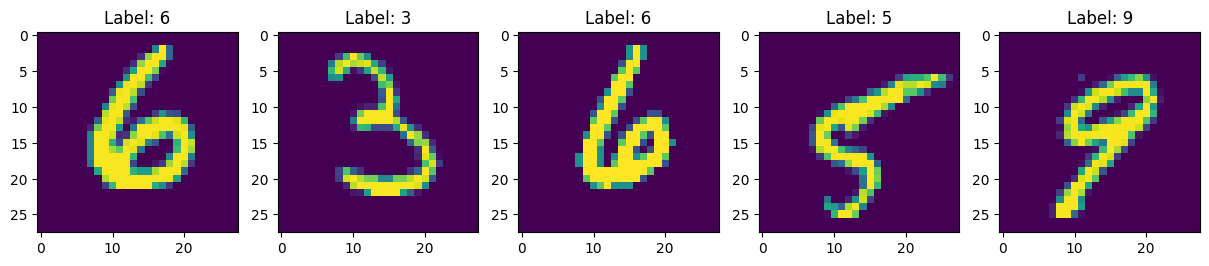

In [45]:
# 훈련 데이터 일부 시각화
plt.figure(figsize=(15, 3))

for i, idx in enumerate(np.random.randint(X_train.shape[0], size=5)):
  
  img = X_train[idx, ...]
  label = y_train[idx]

  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'Label: {label}')

In [46]:
# 데이터 전처리
X_train = X_train.astype("float32") / 255
X_val = X_val.astype("float32") / 255
X_test = X_test.astype("float32") / 255

#### **Tensorflow (Keras)**

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Sequential, Model

In [48]:
# Functional API로 모델 생성 (Sequential API, Subclassing도 상관없음)
input = layers.Input(shape=(X_train.shape[1:]), name="Input")     
x = layers.Flatten(name="Flatten")(input)
x = layers.Dense(300, activation='relu', name="Dense1")(x)
x = layers.Dense(100, activation='relu', name="Dense2")(x)
output = layers.Dense(10, activation='softmax', name="Output")(x)

model = Model(inputs=input, outputs=output, name="MyModel")
model.summary()

Model: "MyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 300)               235500    
                                                                 
 Dense2 (Dense)              (None, 100)               30100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
# 모델 컴파일 (손실 함수, 옵티마이저, 지표 등 설정) (Tensorflow만)
model.compile(loss='sparse_categorical_crossentropy',   # loss = tensorflow.keras.losses.SparseCategoricalCrossentropy()도 사용 가능
              optimizer='sgd',                          # optimizer = tensorflow.keras.optimizers.SGD()도 사용 가능
              metrics=['accuracy'])                     # 모델 성능 지표: Accuracy

In [50]:
# 모델 훈련 (훈련 데이터, 검증 데이터 이용)
history = model.fit(X_train,                             # 훈련 데이터
                    y_train,                             # 훈련 데이터의 정답 레이블
                    epochs=100,                          # 학습 회수 (훈련 데이터 전체를 한번 학습하는 것이 1epoch)
                    batch_size=128,                      # 배치 크기
                    validation_data=(X_val, y_val),      # 검증 데이터
                    verbose=1)                           # 0: silent, 1: progress bar, 2: one line per epoch

Epoch 1/100

329/329 [==============================] - 3s 7ms/step - loss: 1.3333 - accuracy: 0.6965 - val_loss: 0.6986 - val_accuracy: 0.8470
Epoch 2/100
329/329 [==============================] - 2s 6ms/step - loss: 0.5490 - accuracy: 0.8663 - val_loss: 0.4564 - val_accuracy: 0.8810
Epoch 3/100
329/329 [==============================] - 2s 6ms/step - loss: 0.4168 - accuracy: 0.8885 - val_loss: 0.3823 - val_accuracy: 0.8946
Epoch 4/100
329/329 [==============================] - 2s 6ms/step - loss: 0.3636 - accuracy: 0.8997 - val_loss: 0.3465 - val_accuracy: 0.9025
Epoch 5/100
329/329 [==============================] - 2s 7ms/step - loss: 0.3326 - accuracy: 0.9072 - val_loss: 0.3233 - val_accuracy: 0.9092
Epoch 6/100
329/329 [==============================] - 2s 5ms/step - loss: 0.3104 - accuracy: 0.9125 - val_loss: 0.3127 - val_accuracy: 0.9087
Epoch 7/100
329/329 [==============================] - 2s 6ms/step - loss: 0.2933 - accuracy: 0.9166 - val_loss: 0.2872 - val_accuracy: 0.918

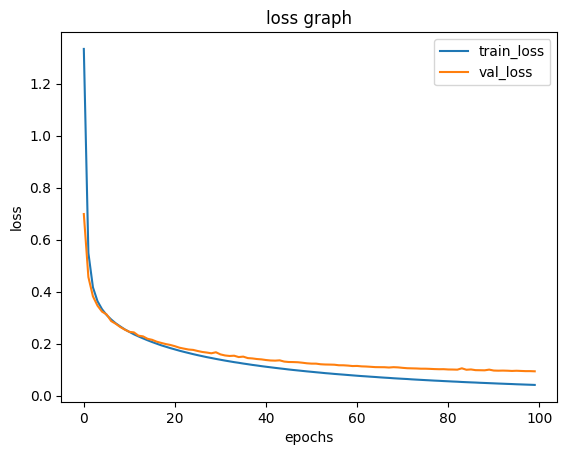

In [51]:
# loss graph 그리기
loss_history = history.history['loss']
val_loss_history = history.history['val_loss']

plt.plot(range(len(loss_history)), loss_history, label="train_loss")
plt.plot(range(len(val_loss_history)), val_loss_history, label="val_loss")
plt.title("loss graph")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [52]:
# 모델 평가 (테스트 데이터 이용)
_ , accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

  1/313 [..............................] - ETA: 8s - loss: 0.0541 - accuracy: 0.9688

313/313 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9738
Accuracy: 0.973800003528595


1/1 [==============================] - 0s 89ms/step
Predicted label: [7]
True label: [7]



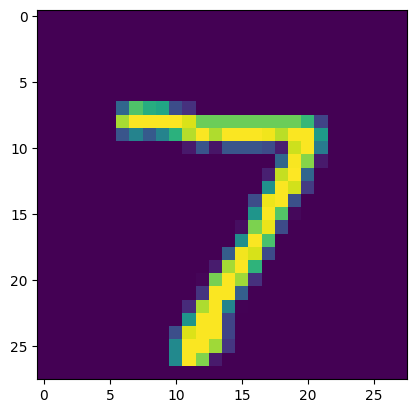

In [53]:
# 모델 예측 (임의의 데이터 이용)
y_pred = model.predict(X_test[:1])
print(f"Predicted label: {np.argmax(y_pred, axis=1)}")
print(f"True label: {y_test[:1]}\n")

plt.imshow(X_test[0])
plt.show()

#### **Pytorch**

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [55]:
# 모델 생성
class MyModel(nn.Module):

  def __init__(self, input_shape=(28,28)):
    super(MyModel, self).__init__()
    self.flatten_layer = nn.Flatten()
    self.dense1_layer = nn.Sequential(nn.Linear(input_shape[0]*input_shape[1],300), nn.ReLU())
    self.dense2_layer = nn.Sequential(nn.Linear(300,100), nn.ReLU())
    self.output_layer = nn.Sequential(nn.Linear(100,10))

  def forward(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

model = MyModel()
model

MyModel(
  (flatten_layer): Flatten(start_dim=1, end_dim=-1)
  (dense1_layer): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU()
  )
  (dense2_layer): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU()
  )
  (output_layer): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [56]:
# 손실 함수, 옵티마이저 설정
loss = nn.CrossEntropyLoss() 
optimizer = th.optim.SGD(model.parameters(), lr=0.05)

# Dataloader 생성
train_dataset = TensorDataset(th.from_numpy(X_train), th.from_numpy(y_train))
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataset = TensorDataset(th.from_numpy(X_val), th.from_numpy(y_val))
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=True)

epochs = 100
train_losses, val_losses = [], []

# 모델 훈련 (훈련 데이터, 검증 데이터 이용)
for i in range(epochs):
  
  train_losses_iter, val_losses_iter = [], []
  
  for X, y in train_dataloader:
    
    model.train()                       # 모델의 training 모드
    y_pred = model(X)
    train_loss = loss(y_pred, y)
    train_losses_iter.append(train_loss.item())

    train_loss.backward()               # gradient 누적
    optimizer.step()                    # 누적된 gradient로 모델의 파라미터 업데이트
    optimizer.zero_grad()               # 누적된 gradient를 0으로 초기화

  for X, y in val_dataloader:
    
    model.eval()                        # 모델의 inference 모드: inference할 때 훈련시킬 때와는 다르게 작동하는 레이어가 있음 (Dropout, BatchNorm 등)
    with th.no_grad():                  # gradient 자동 연산 옵션을 끔 (연산 속도 증가, 메모리 절약)
      y_pred = model(X)
      val_loss = loss(y_pred, y)
      val_losses_iter.append(val_loss.item())
  
  train_loss_epoch = np.array(train_losses_iter).mean()
  val_loss_epoch = np.array(val_losses_iter).mean()
  
  train_losses.append(train_loss_epoch)
  val_losses.append(val_loss_epoch)

  print(f"Epoch {i+1}/{epochs}   train_loss: {round(train_loss_epoch, 4)}   val_loss: {round(val_loss_epoch, 4)}\n")

Epoch 1/100   train_loss: 1.2095   val_loss: 0.5078

Epoch 2/100   train_loss: 0.3994   val_loss: 0.3817

Epoch 3/100   train_loss: 0.3212   val_loss: 0.3266

Epoch 4/100   train_loss: 0.2811   val_loss: 0.2988

Epoch 5/100   train_loss: 0.2501   val_loss: 0.2692

Epoch 6/100   train_loss: 0.2212   val_loss: 0.2193

Epoch 7/100   train_loss: 0.1972   val_loss: 0.2253

Epoch 8/100   train_loss: 0.1781   val_loss: 0.2727

Epoch 9/100   train_loss: 0.1597   val_loss: 0.1711

Epoch 10/100   train_loss: 0.1447   val_loss: 0.1602

Epoch 11/100   train_loss: 0.133   val_loss: 0.1805

Epoch 12/100   train_loss: 0.1212   val_loss: 0.1358

Epoch 13/100   train_loss: 0.1123   val_loss: 0.14

Epoch 14/100   train_loss: 0.1041   val_loss: 0.1455

Epoch 15/100   train_loss: 0.0964   val_loss: 0.1174

Epoch 16/100   train_loss: 0.0898   val_loss: 0.1123

Epoch 17/100   train_loss: 0.0841   val_loss: 0.1336

Epoch 18/100   train_loss: 0.0782   val_loss: 0.1091

Epoch 19/100   train_loss: 0.0737   val_

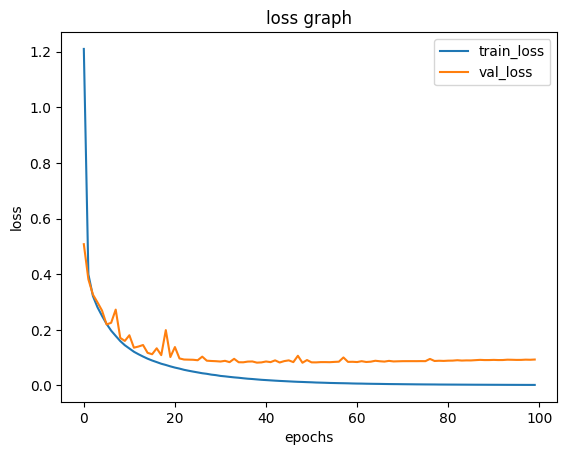

In [57]:
# loss graph 그리기
plt.plot(range(len(train_losses)), train_losses, label="train_loss")
plt.plot(range(len(val_losses)), val_losses, label="val_loss")
plt.title("loss graph")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [58]:
# 모델 평가 (테스트 데이터 이용)
test_dataset = TensorDataset(th.from_numpy(X_test).float(), th.from_numpy(y_test))
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=True)

model.eval()
with th.no_grad():
  correct = 0
  for X, y in test_dataloader:
    correct += (y == th.argmax(nn.Softmax(dim=1)(model(X)), dim=1)).sum()
accuracy = correct / len(test_dataset)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9771999716758728


Predicted label: tensor([7])
True label: [7]



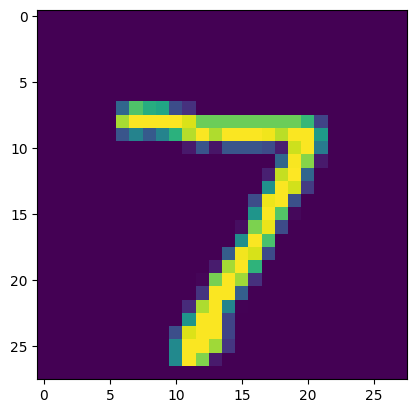

In [59]:
# 모델 예측 (임의의 데이터 이용)
model.eval()
with th.no_grad():
  y_pred = model(th.from_numpy(X_test[:1]))
print(f"Predicted label: {th.argmax(nn.Softmax(dim=1)(y_pred), dim=1)}")
print(f"True label: {y_test[:1]}\n")

plt.imshow(X_test[0])
plt.show()